## Install requirements

In [ ]:
# !pip install networkx
# !pip install matplotlib

## Import libraries

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter

## Utils

In [ ]:
def visualize_graph(G):
  plt.figure(figsize=(6, 4))
  pos = nx.spring_layout(G)
  nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=500, edge_color="gray", font_size=12)
  plt.title("Graph")
  plt.show()

def graph_details(G):
  print("Number of nodes:", G.number_of_nodes())
  print("Number of edges:", G.number_of_edges())
  print("Nodes:", list(G.nodes()))
  print("Nodes:", list(G.nodes(data=True)))
  print("Edges:", list(G.edges()))
  print("Edges:", list(G.edges(data=True)))
  print("Is directed:", G.is_directed())
  print("Is weighted:", nx.is_weighted(G))

def draw_graph(G, title="Graph", seed=42):
  # Extract node types
  node_types = nx.get_node_attributes(G, 'type')
  print(node_types)

  # Define color map for node types
  type_colors = {
      'Student': 'skyblue',
      'Professor': 'lightcoral'
  }

  # Assign color based on node type
  node_colors = [type_colors.get(node_types.get(n, ''), 'skyblue') for n in G.nodes]

  plt.figure(figsize=(6, 4))

  try:
    top = nx.bipartite.sets(G)[0]
    pos = nx.bipartite_layout(G, top)
  except:
    # pos = nx.spring_layout(G)
    pos = nx.planar_layout(G)
  nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500) #, font_weight='bold')

  if nx.get_edge_attributes(G, 'weight'):
    weights = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

  if nx.get_edge_attributes(G, 'label'):
    weights = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

  plt.title(title)
  plt.grid(False)
  plt.show()

## Create a networks

#### Homogeneous graph

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [1, 3],
    [2, 4],
    [2, 6],
    [3, 4],
    [3, 5],
    [4, 5],
    [5, 6]
]

edge_list

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [1, 3],
 [2, 4],
 [2, 6],
 [3, 4],
 [3, 5],
 [4, 5],
 [5, 6]]

Create graph

In [ ]:
G = nx.from_edgelist(edge_list)

Visualization

{}


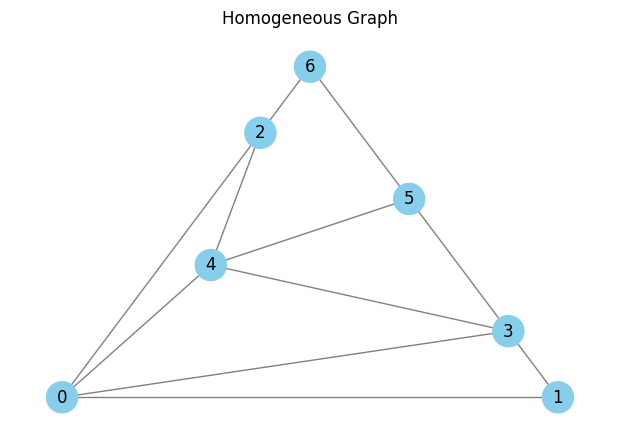

In [ ]:
draw_graph(G, "Homogeneous Graph")

Graph details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 7
Number of edges: 11
Nodes: [0, 1, 2, 3, 4, 6, 5]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (6, {}), (5, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 3), (2, 4), (2, 6), (3, 4), (3, 5), (4, 5), (6, 5)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (1, 3, {}), (2, 4, {}), (2, 6, {}), (3, 4, {}), (3, 5, {}), (4, 5, {}), (6, 5, {})]
Is directed: False
Is weighted: False


#### Heterogeneous graph

In [ ]:
# List of nodes with their types
nodes = [
    (0, {'type': 'Professor'}),
    (1, {'type': 'Student'}),
    (2, {'type': 'Student'}),
    (3, {'type': 'Professor'}),
    (4, {'type': 'Professor'}),
    (5, {'type': 'Student'}),
    (6, {'type': 'Student'}),
]

edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [1, 3],
    [2, 4],
    [2, 6],
    [3, 4],
    [3, 5],
    [4, 5],
    [5, 6]
]

Create graph

In [ ]:
G = nx.Graph()

# Add nodes from list
G.add_nodes_from(nodes)

# Add some edges
G.add_edges_from(edge_list)

Visualization

{0: 'Professor', 1: 'Student', 2: 'Student', 3: 'Professor', 4: 'Professor', 5: 'Student', 6: 'Student'}


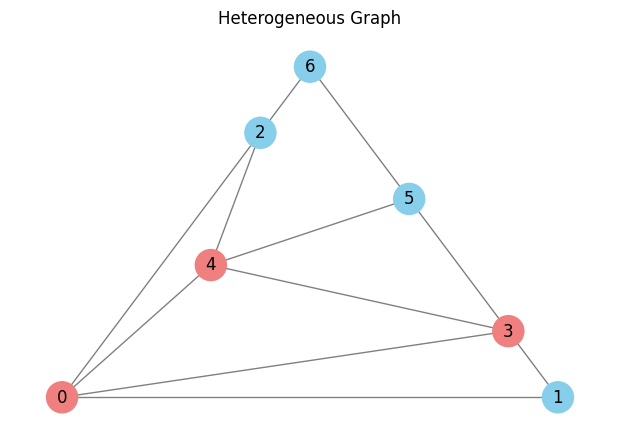

In [ ]:
draw_graph(G, "Heterogeneous Graph")

Graph details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 7
Number of edges: 11
Nodes: [0, 1, 2, 3, 4, 5, 6]
Nodes: [(0, {'type': 'Professor'}), (1, {'type': 'Student'}), (2, {'type': 'Student'}), (3, {'type': 'Professor'}), (4, {'type': 'Professor'}), (5, {'type': 'Student'}), (6, {'type': 'Student'})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 3), (2, 4), (2, 6), (3, 4), (3, 5), (4, 5), (5, 6)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (1, 3, {}), (2, 4, {}), (2, 6, {}), (3, 4, {}), (3, 5, {}), (4, 5, {}), (5, 6, {})]
Is directed: False
Is weighted: False


#### Undirected graph

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [1, 3],
    [2, 4],
    [2, 6],
    [3, 4],
    [3, 5],
    [4, 5],
    [5, 6]
]

edge_list

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [1, 3],
 [2, 4],
 [2, 6],
 [3, 4],
 [3, 5],
 [4, 5],
 [5, 6]]

Create graph

In [ ]:
G = nx.from_edgelist(edge_list)

Visualization

{}


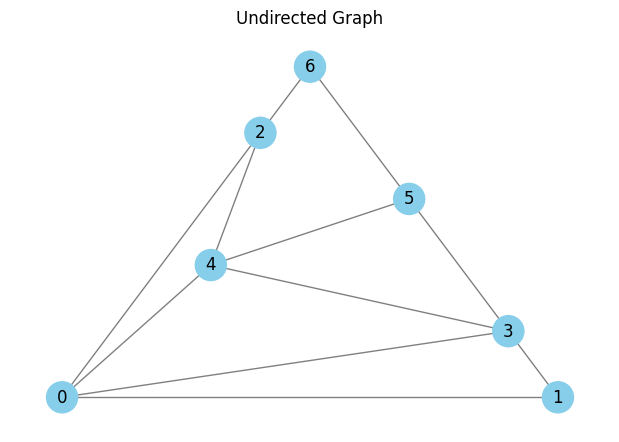

In [ ]:
draw_graph(G, "Undirected Graph")

Graph details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 7
Number of edges: 11
Nodes: [0, 1, 2, 3, 4, 6, 5]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (6, {}), (5, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 3), (2, 4), (2, 6), (3, 4), (3, 5), (4, 5), (6, 5)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (1, 3, {}), (2, 4, {}), (2, 6, {}), (3, 4, {}), (3, 5, {}), (4, 5, {}), (6, 5, {})]
Is directed: False
Is weighted: False


#### Directed graph

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [1, 3],
    [2, 0],
    [2, 6],
    [3, 0],
    [3, 1],
    [3, 4],
    [3, 5],
    [4, 0],
    [4, 2],
    [5, 3],
    [5, 4],
    [6, 5],
]

edge_list

[[0, 1],
 [0, 2],
 [0, 3],
 [1, 3],
 [2, 0],
 [2, 6],
 [3, 0],
 [3, 1],
 [3, 4],
 [3, 5],
 [4, 0],
 [4, 2],
 [5, 3],
 [5, 4],
 [6, 5]]

Create graph

In [ ]:
""" G = nx.DiGraph()
G.add_edges_from(edge_list) """

G = nx.DiGraph(edge_list)

Visualization

{}


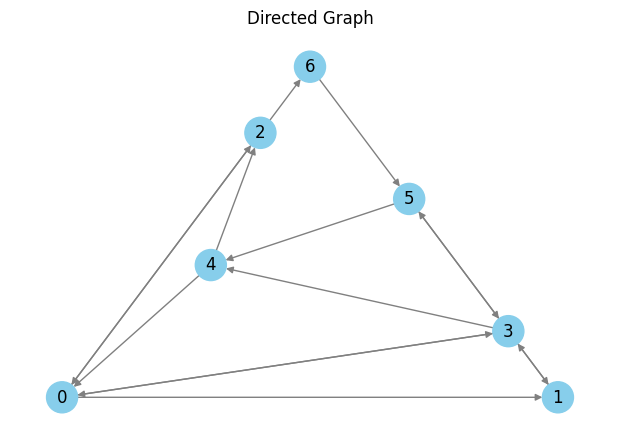

In [ ]:
draw_graph(G, "Directed Graph")

Graph details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 7
Number of edges: 15
Nodes: [0, 1, 2, 3, 6, 4, 5]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (6, {}), (4, {}), (5, {})]
Edges: [(0, 1), (0, 2), (0, 3), (1, 3), (2, 0), (2, 6), (3, 0), (3, 1), (3, 4), (3, 5), (6, 5), (4, 0), (4, 2), (5, 3), (5, 4)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (1, 3, {}), (2, 0, {}), (2, 6, {}), (3, 0, {}), (3, 1, {}), (3, 4, {}), (3, 5, {}), (6, 5, {}), (4, 0, {}), (4, 2, {}), (5, 3, {}), (5, 4, {})]
Is directed: True
Is weighted: False


#### Weighted graph (undirected)

In [ ]:
edge_list = [
    [0, 1, 50],
    [0, 2, 31],
    [0, 3, 79],
    [0, 4, 8],
    [1, 3, 87],
    [2, 4, 56],
    [2, 6, 37],
    [3, 4, 7],
    [3, 5, 10],
    [4, 5, 13],
    [5, 6, 33]
]

edge_list

[[0, 1, 50],
 [0, 2, 31],
 [0, 3, 79],
 [0, 4, 8],
 [1, 3, 87],
 [2, 4, 56],
 [2, 6, 37],
 [3, 4, 7],
 [3, 5, 10],
 [4, 5, 13],
 [5, 6, 33]]

Create graph

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from(edge_list)

Visualization

{}


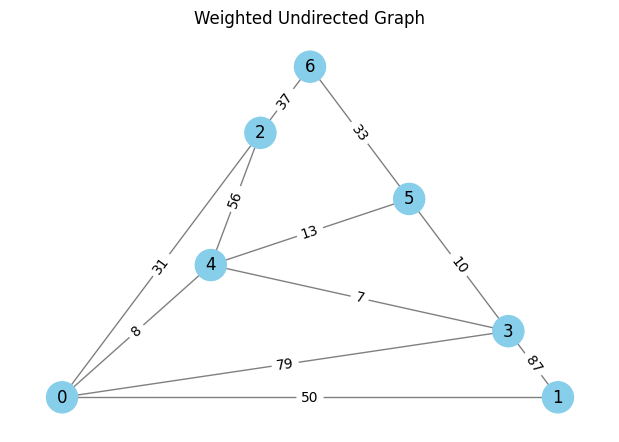

In [ ]:
draw_graph(G, "Weighted Undirected Graph")

Graph details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 7
Number of edges: 11
Nodes: [0, 1, 2, 3, 4, 6, 5]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (6, {}), (5, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 3), (2, 4), (2, 6), (3, 4), (3, 5), (4, 5), (6, 5)]
Edges: [(0, 1, {'weight': 50}), (0, 2, {'weight': 31}), (0, 3, {'weight': 79}), (0, 4, {'weight': 8}), (1, 3, {'weight': 87}), (2, 4, {'weight': 56}), (2, 6, {'weight': 37}), (3, 4, {'weight': 7}), (3, 5, {'weight': 10}), (4, 5, {'weight': 13}), (6, 5, {'weight': 33})]
Is directed: False
Is weighted: True


#### Weighted graph (directed)

In [ ]:
edge_list = [
    [0, 1, 23],
    [0, 2, 37],
    [0, 3, 11],
    [1, 3, 79],
    [2, 0, 37],
    [2, 6, 7],
    [3, 0, 11],
    [3, 1, 79],
    [3, 4, 2],
    [3, 5, 13],
    [4, 0, 3],
    [4, 2, 7],
    [5, 3, 13],
    [5, 4, 1],
    [6, 5, 4],
]

edge_list

[[0, 1, 23],
 [0, 2, 37],
 [0, 3, 11],
 [1, 3, 79],
 [2, 0, 37],
 [2, 6, 7],
 [3, 0, 11],
 [3, 1, 79],
 [3, 4, 2],
 [3, 5, 13],
 [4, 0, 3],
 [4, 2, 7],
 [5, 3, 13],
 [5, 4, 1],
 [6, 5, 4]]

Create graph

In [ ]:
G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

Visualization

{}


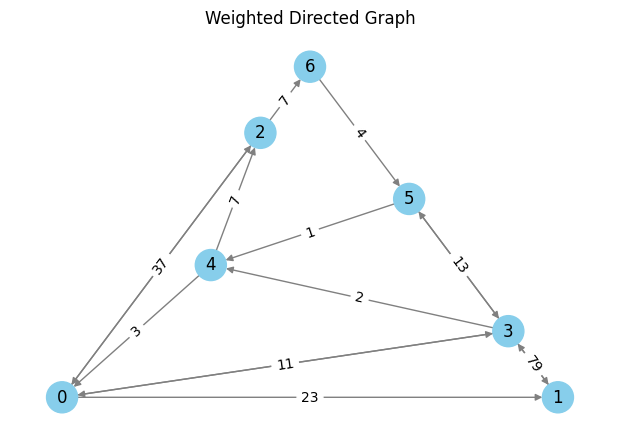

In [ ]:
draw_graph(G, "Weighted Directed Graph")

Graph details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 7
Number of edges: 15
Nodes: [0, 1, 2, 3, 6, 4, 5]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (6, {}), (4, {}), (5, {})]
Edges: [(0, 1), (0, 2), (0, 3), (1, 3), (2, 0), (2, 6), (3, 0), (3, 1), (3, 4), (3, 5), (6, 5), (4, 0), (4, 2), (5, 3), (5, 4)]
Edges: [(0, 1, {'weight': 23}), (0, 2, {'weight': 37}), (0, 3, {'weight': 11}), (1, 3, {'weight': 79}), (2, 0, {'weight': 37}), (2, 6, {'weight': 7}), (3, 0, {'weight': 11}), (3, 1, {'weight': 79}), (3, 4, {'weight': 2}), (3, 5, {'weight': 13}), (6, 5, {'weight': 4}), (4, 0, {'weight': 3}), (4, 2, {'weight': 7}), (5, 3, {'weight': 13}), (5, 4, {'weight': 1})]
Is directed: True
Is weighted: True


## Metrics on networks

### Node-level

#### Degree

Create graph

{}


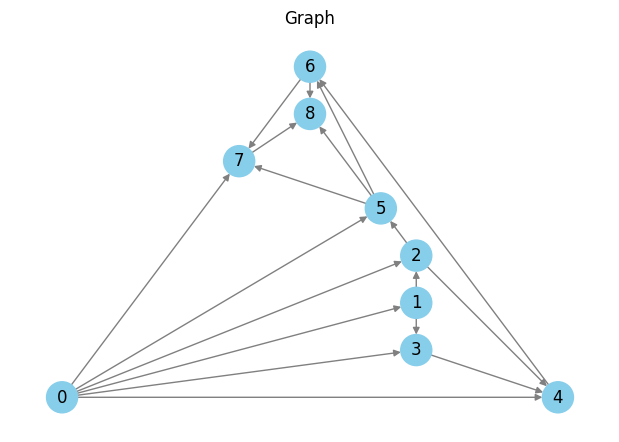

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.DiGraph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 8, {}), (5, 6, {}), (5, 7, {}), (5, 8, {}), (6, 7, {}), (6, 8, {})]
Is directed: True
Is weighted: False


**Calculate node degree**

In [ ]:
degrees = G.degree()
print("Degrees:\t", degrees)

in_degrees = G.in_degree()
print("In degrees:\t", in_degrees)

out_degrees = G.out_degree()
print("Out degrees:\t", out_degrees)

Degrees:	 [(0, 6), (1, 3), (2, 4), (3, 3), (4, 4), (7, 4), (5, 5), (6, 4), (8, 3)]
In degrees:	 [(0, 0), (1, 1), (2, 2), (3, 2), (4, 3), (7, 3), (5, 2), (6, 2), (8, 3)]
Out degrees:	 [(0, 6), (1, 2), (2, 2), (3, 1), (4, 1), (7, 1), (5, 3), (6, 2), (8, 0)]


In [ ]:
# Get the degree of each node

for node, degree in degrees:
    print(f"Node {node}: degree = {degree}")

Node 0: degree = 6
Node 1: degree = 3
Node 2: degree = 4
Node 3: degree = 3
Node 4: degree = 4
Node 7: degree = 4
Node 5: degree = 5
Node 6: degree = 4
Node 8: degree = 3


In [ ]:
# Create DataFrame
degrees_dict = dict(degrees)
df = pd.DataFrame({
    "Node": list(degrees_dict.keys()),
    "Degree": list(degrees_dict.values())
})
df

,Node,Degree
0,0,6
1,1,3
2,2,4
3,3,3
4,4,4
5,7,4
6,5,5
7,6,4
8,8,3


#### Average degree

Create graph

{}


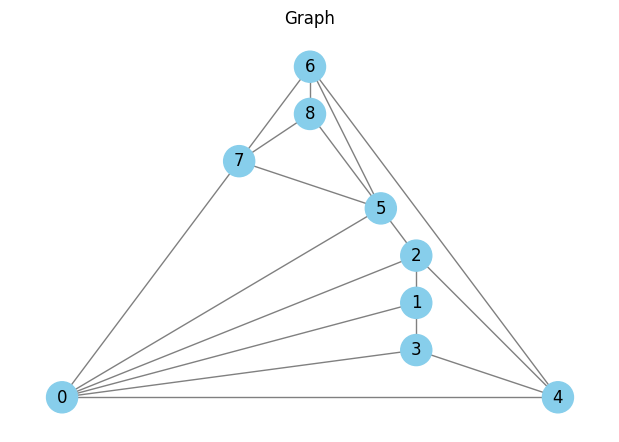

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate average degree**

In [ ]:
# Get degrees of all nodes
degrees = [degree for _, degree in G.degree()]
degrees

[6, 3, 4, 3, 4, 4, 5, 4, 3]

In [ ]:
# Compute average degree
avg_degree = sum(degrees) / G.number_of_nodes()

print(f"Average degree: {avg_degree:.2f}")

Average degree: 4.00


#### Degree distribution

Create graph

{}


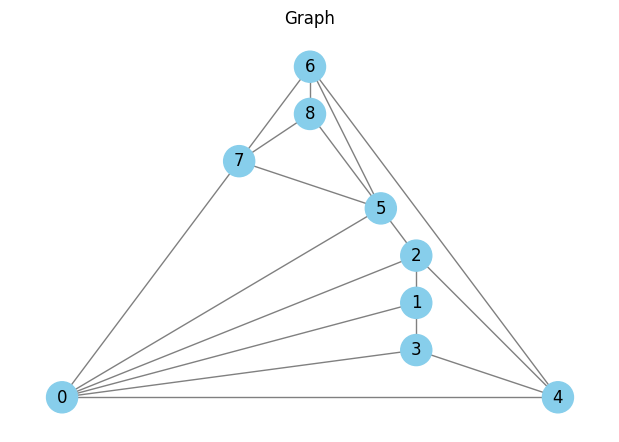

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate degree distribution**

In [ ]:
# Get degrees of all nodes
degrees = [degree for _, degree in G.degree()]
degrees

[6, 3, 4, 3, 4, 4, 5, 4, 3]

In [ ]:
# Count how many times each degree occurs
degree_count = Counter(degrees)
degree_count

Counter({6: 1, 3: 3, 4: 4, 5: 1})

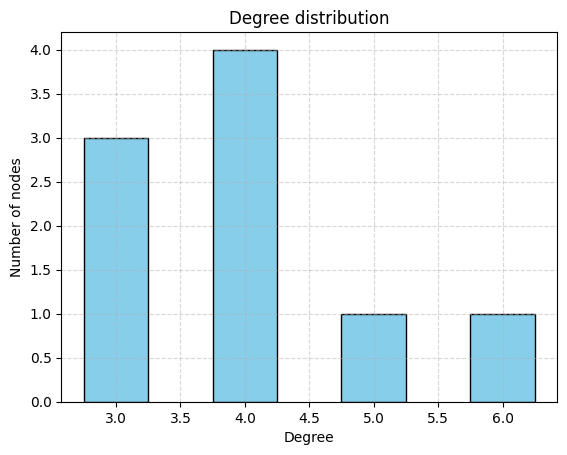

In [ ]:
# Separate for plotting
degree, count = zip(*sorted(degree_count.items()))

# Plot the degree distribution
plt.bar(degree, count, width=0.5, color="skyblue", edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree distribution")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### Degree centrality

Create graph

{}


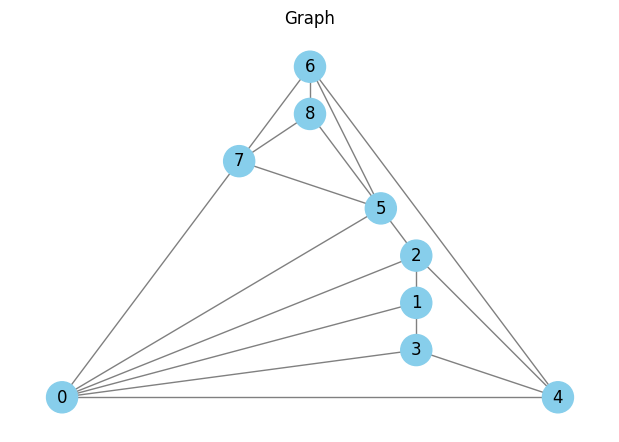

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate degree centrality**

In [ ]:
# Compute degree centrality
centrality = nx.degree_centrality(G)
centrality

{0: 0.75,
 1: 0.375,
 2: 0.5,
 3: 0.375,
 4: 0.5,
 7: 0.5,
 5: 0.625,
 6: 0.5,
 8: 0.375}

In [ ]:
# Print the degree centrality for each node
for node, value in centrality.items():
    print(f"Node {node}: degree centrality = {value:.2f}")

Node 0: degree centrality = 0.75
Node 1: degree centrality = 0.38
Node 2: degree centrality = 0.50
Node 3: degree centrality = 0.38
Node 4: degree centrality = 0.50
Node 7: degree centrality = 0.50
Node 5: degree centrality = 0.62
Node 6: degree centrality = 0.50
Node 8: degree centrality = 0.38


In [ ]:
# Create DataFrame
degree = dict(G.degree())

df = pd.DataFrame({
    "Node": list(G.nodes()),
    "Degree": [degree[node] for node in G.nodes()],
    "Degree centrality": [centrality[node] for node in G.nodes()]
})
df

,Node,Degree,Degree centrality
0,0,6,0.750
1,1,3,0.375
2,2,4,0.500
3,3,3,0.375
4,4,4,0.500
5,7,4,0.500
6,5,5,0.625
7,6,4,0.500
8,8,3,0.375


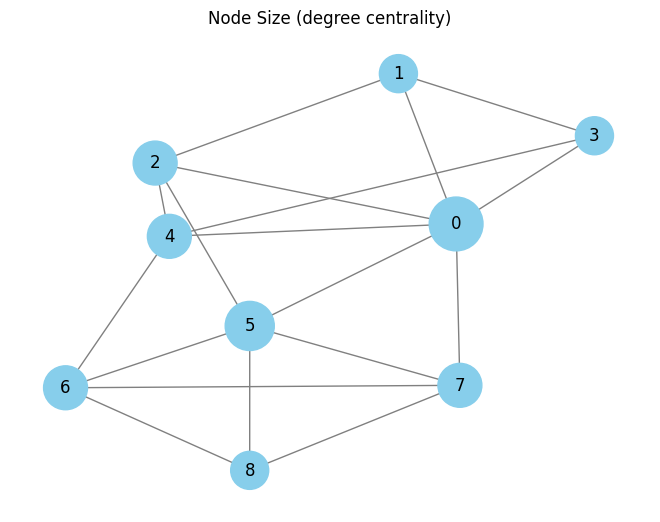

In [ ]:
# Node size based on degree centrality

node_size = [2000 * centrality[node] for node in G.nodes()]
nx.draw(G, with_labels=True, node_size=node_size, node_color="skyblue", edge_color="gray")
plt.title("Node Size (degree centrality)")
plt.show()


#### Closeness centrality

Create graph

{}


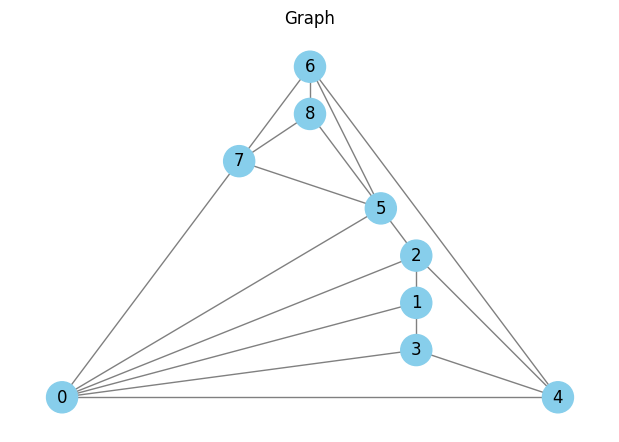

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate closeness centrality**

In [ ]:
# Compute closeness centrality
closeness = nx.closeness_centrality(G)
closeness

{0: 0.8,
 1: 0.5333333333333333,
 2: 0.6666666666666666,
 3: 0.5714285714285714,
 4: 0.6666666666666666,
 7: 0.6666666666666666,
 5: 0.7272727272727273,
 6: 0.6153846153846154,
 8: 0.5333333333333333}

In [ ]:
# Print the degree centrality for each node
for node, value in closeness.items():
    print(f"Node {node}: closeness centrality = {value:.2f}")

Node 0: closeness centrality = 0.80
Node 1: closeness centrality = 0.53
Node 2: closeness centrality = 0.67
Node 3: closeness centrality = 0.57
Node 4: closeness centrality = 0.67
Node 7: closeness centrality = 0.67
Node 5: closeness centrality = 0.73
Node 6: closeness centrality = 0.62
Node 8: closeness centrality = 0.53


In [ ]:
# Create DataFrame
df = pd.DataFrame({
    "Node": list(closeness.keys()),
    "Closeness centrality": list(closeness.values())
})
df

,Node,Closeness centrality
0,0,0.800000
1,1,0.533333
2,2,0.666667
3,3,0.571429
4,4,0.666667
5,7,0.666667
6,5,0.727273
7,6,0.615385
8,8,0.533333


#### Betweenness centrality

Create graph

{}


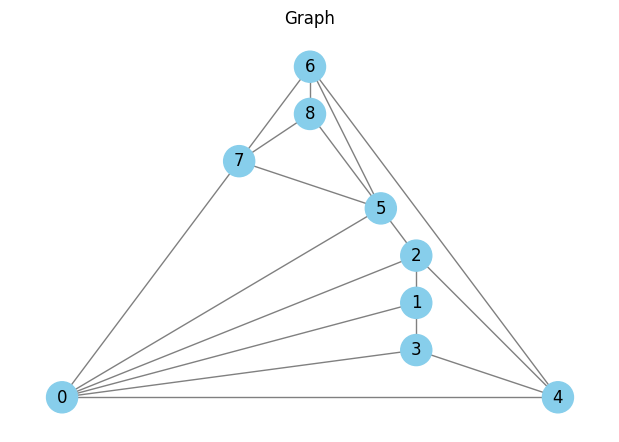

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate betweenness centrality**

In [ ]:
# Compute betweenness centrality
betweenness = nx.betweenness_centrality(G)
betweenness

{0: 0.2619047619047619,
 1: 0.011904761904761904,
 2: 0.06547619047619048,
 3: 0.017857142857142853,
 4: 0.10714285714285712,
 7: 0.059523809523809514,
 5: 0.14880952380952378,
 6: 0.07738095238095237,
 8: 0.0}

In [ ]:
# Print the betweenness centrality for each node
for node, value in betweenness.items():
    print(f"Node {node}: betweenness centrality = {value:.2f}")

Node 0: betweenness centrality = 0.26
Node 1: betweenness centrality = 0.01
Node 2: betweenness centrality = 0.07
Node 3: betweenness centrality = 0.02
Node 4: betweenness centrality = 0.11
Node 7: betweenness centrality = 0.06
Node 5: betweenness centrality = 0.15
Node 6: betweenness centrality = 0.08
Node 8: betweenness centrality = 0.00


In [ ]:
# Create DataFrame
df = pd.DataFrame({
    "Node": list(betweenness.keys()),
    "Betweenness centrality": list(betweenness.values())
})
df

,Node,Betweenness centrality
0,0,0.261905
1,1,0.011905
2,2,0.065476
3,3,0.017857
4,4,0.107143
5,7,0.059524
6,5,0.148810
7,6,0.077381
8,8,0.000000


#### Eccentricity

Create graph

{}


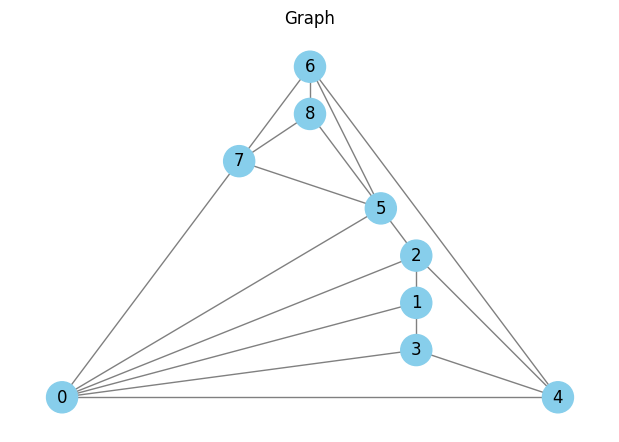

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate betweenness centrality**

In [ ]:
# Compute eccentricity for all nodes
eccentricity = nx.eccentricity(G)
eccentricity

{0: 2, 1: 3, 2: 2, 3: 3, 4: 2, 7: 2, 5: 2, 6: 3, 8: 3}

In [ ]:
# Print the eccentricity for each node
for node, value in eccentricity.items():
    print(f"Node {node}: eccentricity = {value:.2f}")

Node 0: eccentricity = 2.00
Node 1: eccentricity = 3.00
Node 2: eccentricity = 2.00
Node 3: eccentricity = 3.00
Node 4: eccentricity = 2.00
Node 7: eccentricity = 2.00
Node 5: eccentricity = 2.00
Node 6: eccentricity = 3.00
Node 8: eccentricity = 3.00


In [ ]:
# Create DataFrame
df = pd.DataFrame({
    "Node": list(eccentricity.keys()),
    "Eccentricity": list(eccentricity.values())
})
df

,Node,Eccentricity
0,0,2
1,1,3
2,2,2
3,3,3
4,4,2
5,7,2
6,5,2
7,6,3
8,8,3


#### **Summary**

Create graph

{}


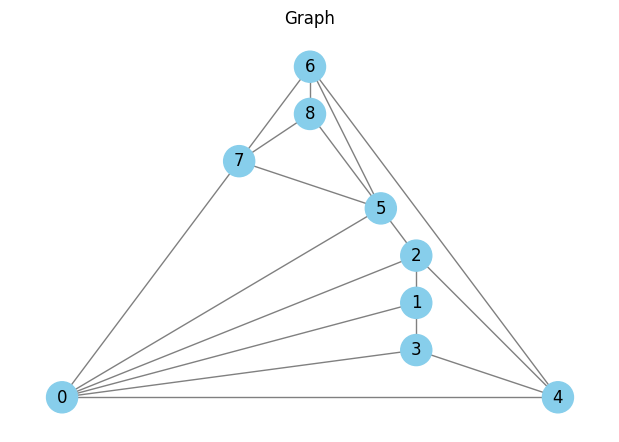

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate metrics**

In [ ]:
# Compute metrics for all nodes
degree = dict(G.degree())
centrality = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
eccentricity = nx.eccentricity(G)

# Combine into a DataFrame
df = pd.DataFrame({
    "Node": list(degree.keys()),
    "Degree": list(degree.values()),
    "Centrality": list(centrality.values()),
    "Closeness": list(closeness.values()),
    "Betweenness": list(betweenness.values()),
    "Eccentricity": list(eccentricity.values())
})
df

,Node,Degree,Centrality,Closeness,Betweenness,Eccentricity
0,0,6,0.750,0.800000,0.261905,2
1,1,3,0.375,0.533333,0.011905,3
2,2,4,0.500,0.666667,0.065476,2
3,3,3,0.375,0.571429,0.017857,3
4,4,4,0.500,0.666667,0.107143,2
5,7,4,0.500,0.666667,0.059524,2
6,5,5,0.625,0.727273,0.148810,2
7,6,4,0.500,0.615385,0.077381,3
8,8,3,0.375,0.533333,0.000000,3


### Edge-level

#### Betweenness centrality

Create graph

{}


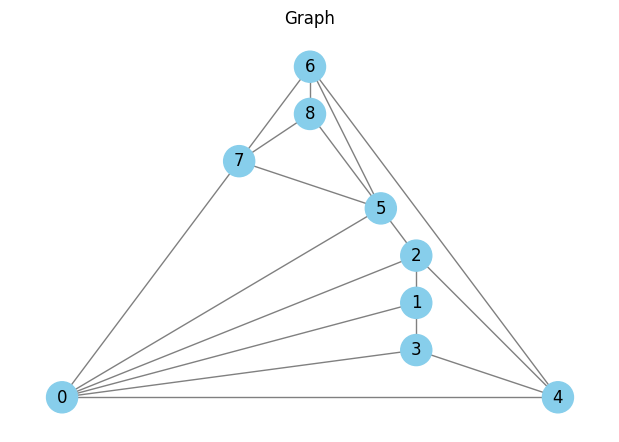

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate betweenness centrality**

In [ ]:
# Compute betweenness centrality
betweenness = nx.edge_betweenness_centrality(G)
betweenness

{(0, 1): 0.1111111111111111,
 (0, 2): 0.05092592592592592,
 (0, 3): 0.1111111111111111,
 (0, 4): 0.07407407407407407,
 (0, 7): 0.15740740740740738,
 (0, 5): 0.12499999999999997,
 (1, 2): 0.07870370370370368,
 (1, 3): 0.05092592592592592,
 (2, 4): 0.07407407407407407,
 (2, 5): 0.12037037037037035,
 (3, 4): 0.08796296296296295,
 (4, 6): 0.15277777777777776,
 (7, 5): 0.041666666666666664,
 (7, 6): 0.05555555555555555,
 (7, 8): 0.060185185185185175,
 (5, 6): 0.06944444444444445,
 (5, 8): 0.09722222222222221,
 (6, 8): 0.0648148148148148}

In [ ]:
# Print the betweenness centrality for each node
for edge, value in betweenness.items():
    print(f"Edge {edge}: betweenness centrality = {value:.2f}")

Edge (0, 1): betweenness centrality = 0.11
Edge (0, 2): betweenness centrality = 0.05
Edge (0, 3): betweenness centrality = 0.11
Edge (0, 4): betweenness centrality = 0.07
Edge (0, 7): betweenness centrality = 0.16
Edge (0, 5): betweenness centrality = 0.12
Edge (1, 2): betweenness centrality = 0.08
Edge (1, 3): betweenness centrality = 0.05
Edge (2, 4): betweenness centrality = 0.07
Edge (2, 5): betweenness centrality = 0.12
Edge (3, 4): betweenness centrality = 0.09
Edge (4, 6): betweenness centrality = 0.15
Edge (7, 5): betweenness centrality = 0.04
Edge (7, 6): betweenness centrality = 0.06
Edge (7, 8): betweenness centrality = 0.06
Edge (5, 6): betweenness centrality = 0.07
Edge (5, 8): betweenness centrality = 0.10
Edge (6, 8): betweenness centrality = 0.06


In [ ]:
# Create DataFrame
df = pd.DataFrame({
    "Edge": list(betweenness.keys()),
    "Betweenness centrality": list(betweenness.values())
})
df

,Edge,Betweenness centrality
0,"(0, 1)",0.111111
1,"(0, 2)",0.050926
2,"(0, 3)",0.111111
3,"(0, 4)",0.074074
4,"(0, 7)",0.157407
5,"(0, 5)",0.125000
6,"(1, 2)",0.078704
7,"(1, 3)",0.050926
8,"(2, 4)",0.074074
9,"(2, 5)",0.120370


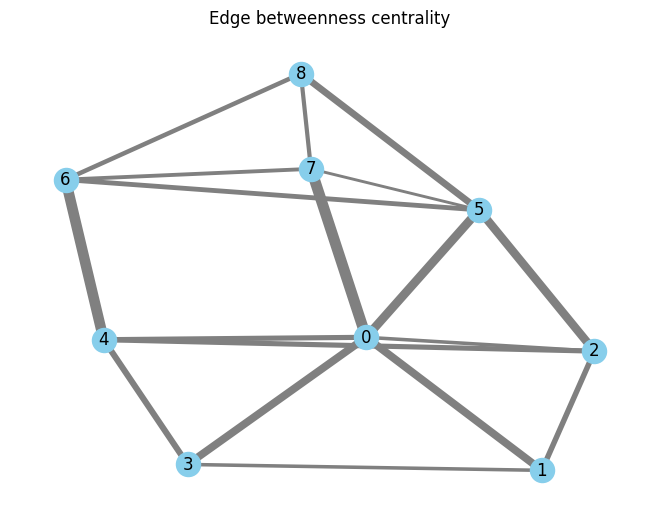

In [ ]:
# Visualize with edge width
pos = nx.spring_layout(G)
widths = [betweenness[edge] * 50 for edge in G.edges()]

nx.draw(G, pos, with_labels=True, width=widths, edge_color="gray", node_color="skyblue")
plt.title("Edge betweenness centrality")
plt.show()

### Graph-level

#### Density

Create graph

{}


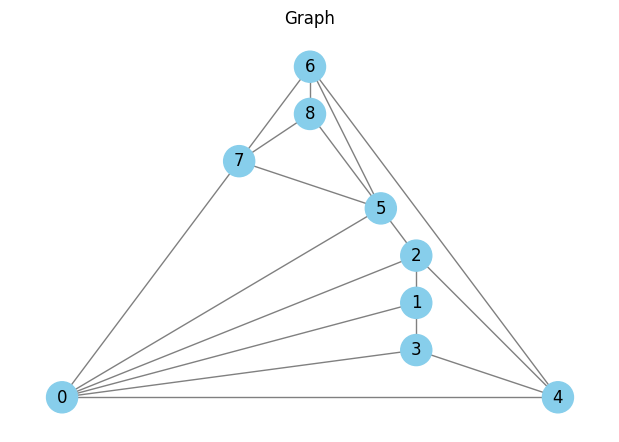

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate density**

In [ ]:
# Compute density
density = nx.density(G)
density

0.5

In [ ]:
print(f"Graph density: {density:.3f}")

Graph density: 0.500


#### Diameter

Create graph

{}


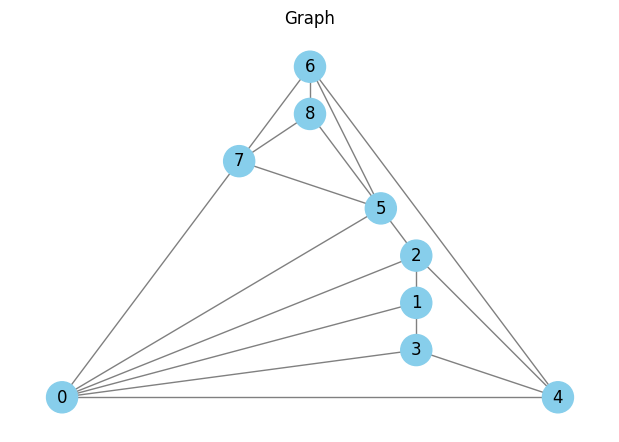

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate diameter**

In [ ]:
# Compute diameter
diameter = nx.diameter(G)
diameter

3

In [ ]:
print(f"Graph diameter: {diameter}")

Graph diameter: 3


#### Radius

Create graph

{}


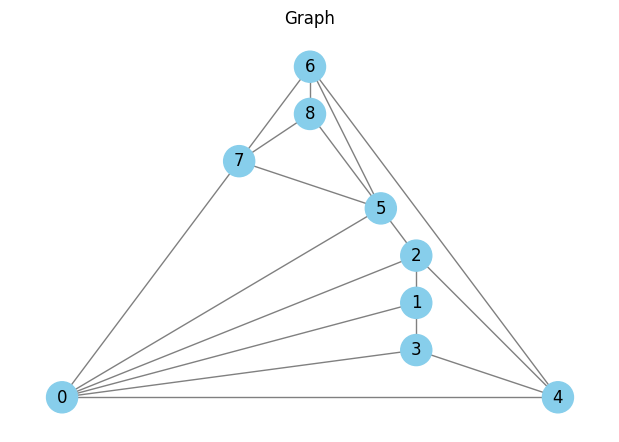

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate radius**

In [ ]:
# Compute radius
radius = nx.radius(G)
radius

2

In [ ]:
print(f"Graph radius: {radius}")

Graph radius: 2


#### Clustering coefficient

Create graph

{}


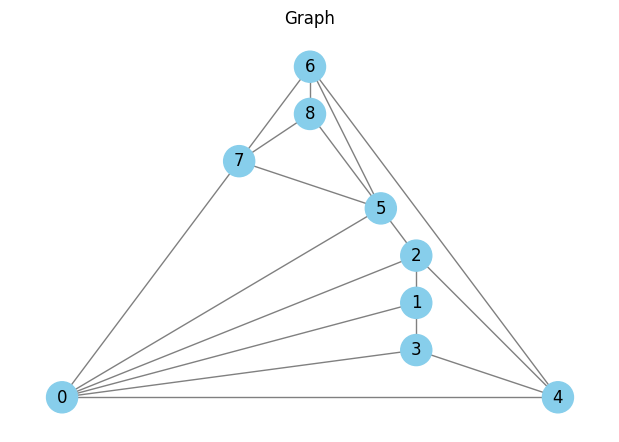

In [ ]:
edge_list = [
    [0, 1],
    [0, 2],
    [0, 3],
    [0, 4],
    [0, 7],
    [0, 5],
    [1, 2],
    [1, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [4, 6],
    [5, 6],
    [5, 7],
    [5, 8],
    [6, 7],
    [6, 8],
    [7, 8]
]

G = nx.Graph()
G.add_edges_from(edge_list)

draw_graph(G, "Graph")

Details

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes()))
print("Nodes:", list(G.nodes(data=True)))
print("Edges:", list(G.edges()))
print("Edges:", list(G.edges(data=True)))
print("Is directed:", G.is_directed())
print("Is weighted:", nx.is_weighted(G))

Number of nodes: 9
Number of edges: 18
Nodes: [0, 1, 2, 3, 4, 7, 5, 6, 8]
Nodes: [(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (7, {}), (5, {}), (6, {}), (8, {})]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 7), (0, 5), (1, 2), (1, 3), (2, 4), (2, 5), (3, 4), (4, 6), (7, 5), (7, 6), (7, 8), (5, 6), (5, 8), (6, 8)]
Edges: [(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (0, 5, {}), (1, 2, {}), (1, 3, {}), (2, 4, {}), (2, 5, {}), (3, 4, {}), (4, 6, {}), (7, 5, {}), (7, 6, {}), (7, 8, {}), (5, 6, {}), (5, 8, {}), (6, 8, {})]
Is directed: False
Is weighted: False


**Calculate clustering coefficient**

In [ ]:
# Local clustering coefficient per node
local_clustering = nx.clustering(G)
local_clustering

{0: 0.4,
 1: 0.6666666666666666,
 2: 0.5,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 7: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 8: 1.0}

In [ ]:
# Print the local clustering coefficient for each node
for node, value in local_clustering.items():
    print(f"Node {node}: clustering coefficient = {value:.2f}")

Node 0: clustering coefficient = 0.40
Node 1: clustering coefficient = 0.67
Node 2: clustering coefficient = 0.50
Node 3: clustering coefficient = 0.67
Node 4: clustering coefficient = 0.33
Node 7: clustering coefficient = 0.67
Node 5: clustering coefficient = 0.50
Node 6: clustering coefficient = 0.50
Node 8: clustering coefficient = 1.00


In [ ]:
# Create DataFrame
df = pd.DataFrame({
    "Edge": list(local_clustering.keys()),
    "Clustering coefficient": list(local_clustering.values())
})
df

,Edge,Clustering coefficient
0,0,0.400000
1,1,0.666667
2,2,0.500000
3,3,0.666667
4,4,0.333333
5,7,0.666667
6,5,0.500000
7,6,0.500000
8,8,1.000000


## Ejercicios

1. Generar el siguiente grafo *G*.

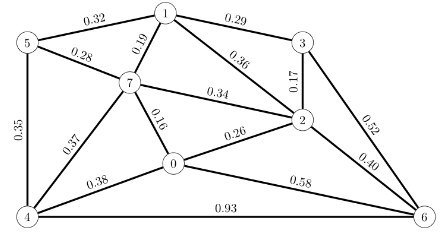

In [ ]:
# Code here


2. Mostrar la información del grafo *G*.

In [ ]:
# Code here


3. Aplicar las métricas (Node-level, Edge-level y Graph-level) sobre el grafo *G*.



In [ ]:
# Code here
